In [70]:
# LIBRARY
# vector manipulation
import numpy as np
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

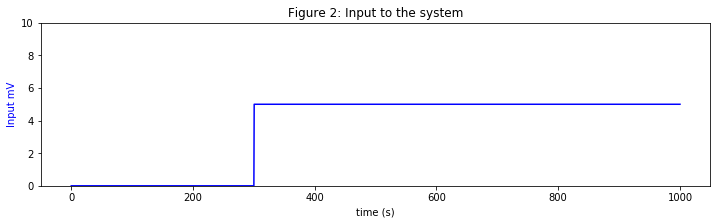

In [71]:
#### Model Input
h=0.5 #step size
input_onset=300             # Onset of input
input_amp=5                 # AMPLITUDE OF INPUT


time=np.arange(0,1000.1,h)  # time period 1000ms (1s)

def Input(input_onset,input_amp):
    I=np.zeros((len(time)))     # CURRENT (INPUT)

    for k in range (0,len(time)):
        if time[k] >input_onset:
            I[k]=input_amp # Input change
    return I

# PLOTTING THE INPUT    
fig, ax1 = plt.subplots(figsize=(12,3))
ax1.plot(time, Input(input_onset,input_amp), 'b-') # y label
ax1.set_xlabel('time (s)') # x label
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Input mV', color='b')
ax1.set_ylim(0,input_amp*2) # setting the plotting range
plt.title('Figure 2: Input to the system')
plt.show()   

In [75]:
# Numerical Solution to the Izhikevich model
def Discrete_Model(a,b,u,v,I):
    v = v + h *(0.04*v*v+5*v+140-u+I) # Discrete form of membrane potential of the neuron 
    u = u + h *(a*(b*v-u))            # Discrete form of membrane recovery variable
    return u,v      

In [76]:
def Izhikevich(a,b,c,d):
    v=-65*np.ones((len(time)))  # SETS UP THE INITIAL VALUES of the membrane potential
    u=0*np.ones((len(time)))    # SETS UP THE INITIAL VALUES of the membrane recovery
    u[0]=b*v[0]                 # INITIAL CONDITION 
    
    spiketime=[]
    fired=[]
    I=Input(input_onset,input_amp)
    # EULER METHOD
    for k in range (0,len(time)-1):
        u[k+1],v[k+1]=Discrete_Model(a,b,u[k],v[k],I[k]) # Numerically solving the equations at each time point
           
        if v[k+1]>30:
            v[k+1]=c
            u[k+1]=u[k+1]+d
    plot_input_output(time,v,I,a,b,c,d)   


In [77]:
def plot_input_output(time,v,I,a,b,c,d):   
    # PLOTTING
    fig, ax1 = plt.subplots(figsize=(12,3))
    ax1.plot(time, v, 'b-', label = 'Output')
    ax1.set_xlabel('time (ms)')
    # Make the y-axis label, ticks and tick labels match the line color.
    # Plotting out put 
    ax1.set_ylabel('Output mV', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(-95,40)
    ax2 = ax1.twinx()
    # Plotting input on a different axis
    ax2.plot(time, I, 'r', label = 'Input')
    ax2.set_ylim(0,input_amp*20)
    ax2.set_ylabel('Input (mV)', color='r')
    ax2.tick_params('y', colors='r')
    
    fig.tight_layout()
    ax1.legend(loc=1)
    ax2.legend(loc=3)
    ax1.set_title('Parameters a %s b: %s c:  %s d:  %s' %(a,b,c,d))
    plt.show()

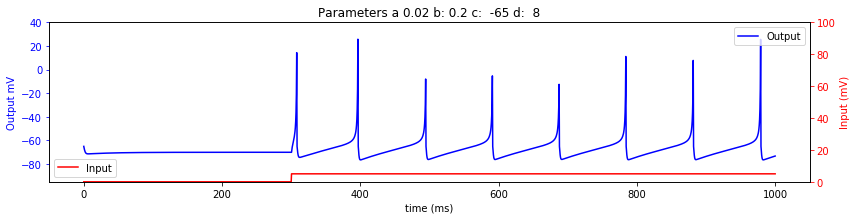

In [78]:
Izhikevich(0.02,0.2,-65,8)

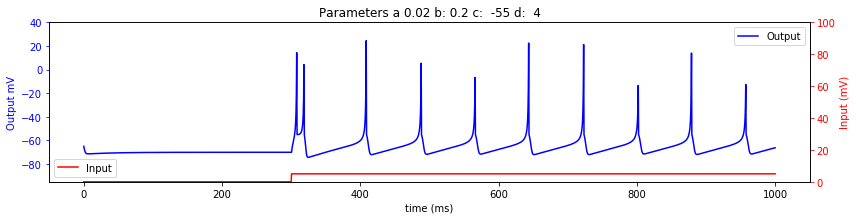

In [79]:
Izhikevich(0.02,0.2,-55,4)

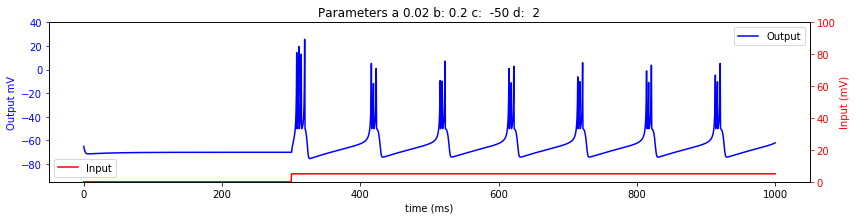

In [80]:
Izhikevich(0.02,0.2,-50,2)

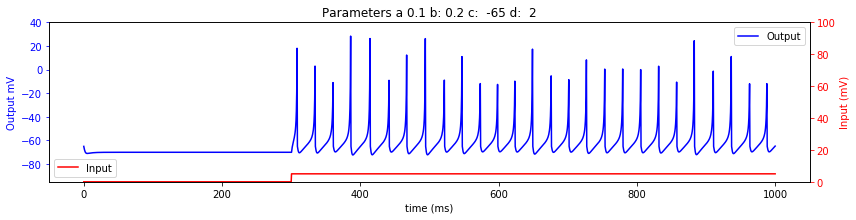

In [81]:
Izhikevich(0.1,0.2,-65,2)

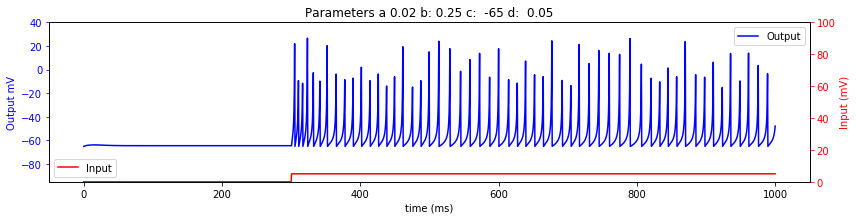

In [82]:
Izhikevich(0.02,0.25,-65,0.05)

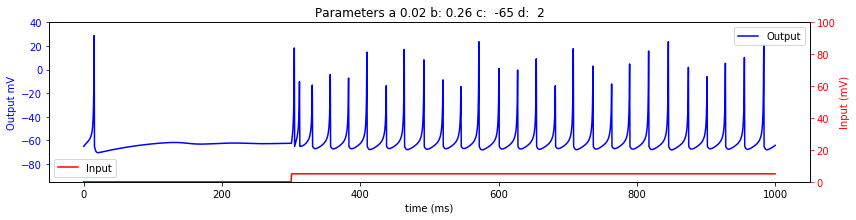

In [83]:
Izhikevich(0.02,0.26,-65,2)

In [84]:
### Undersdtanding Izhikevich model

In [85]:
import matplotlib.pyplot as plt
import neat

In [96]:
def plot_spikes(spikes, title):
    """ Plots the trains for a single spiking neuron. """
    t_values = [t for t, I, v, u, f in spikes]
    v_values = [v for t, I, v, u, f in spikes]
    u_values = [u for t, I, v, u, f in spikes]
    I_values = [I for t, I, v, u, f in spikes]
    f_values = [f for t, I, v, u, f in spikes]

    fig = plt.figure()
    plt.subplot(4, 1, 1)
    plt.ylabel("Potential (mv)")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, v_values, "g-")

    plt.title("Izhikevich's spiking neuron model ({0!s})".format(title))

    plt.subplot(4, 1, 2)
    plt.ylabel("Fired")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, f_values, "r-")

    plt.subplot(4, 1, 3)
    plt.ylabel("Recovery (u)")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, u_values, "r-")

    plt.subplot(4, 1, 4)
    plt.ylabel("Current (I)")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, I_values, "r-o")

    fig = plt.figure()
    plt.title("Izhikevich's spiking neuron model u/v ({0!s})".format(title))
    plt.xlabel("Recovery (u)")
    plt.ylabel("Potential (mv)")
    plt.grid()
    plt.plot(u_values, v_values, 'r-')

    plt.show()
    plt.close()


def show(title, a, b, c, d):
    n = neat.iznn.IZNeuron(0.0, a, b, c, d, [])
    spike_train = []
    for i in range(1000):
        n.current = 0.0 if i < 100 or i > 800 else 10.0
        print(n.current)
        spike_train.append((1.0 * i, n.current, n.v, n.u, n.fired))
        # print('{0:d}\t{1:f}\t{2:f}\t{3:f}'.format(i, n.current, n.v, n.u))
        n.advance(0.25)

    plot_spikes(spike_train, title)

# show('regular spiking', **neat.iznn.REGULAR_SPIKING_PARAMS)

# show('intrinsically bursting', **neat.iznn.INTRINSICALLY_BURSTING_PARAMS)

# show('chattering', **neat.iznn.CHATTERING_PARAMS)

# show('fast spiking', **neat.iznn.FAST_SPIKING_PARAMS)

# show('low-threshold spiking', **neat.iznn.LOW_THRESHOLD_SPIKING_PARAMS)

# show('thalamo-cortical', 0.02, 0.25, -65.0, 0.05)

# show('resonator', 0.1, 0.26, -65.0, 2.0)

# plt.show()

In [97]:
n = neat.iznn.IZNeuron(0.0, 0.02, 0.2, -65.0, 8.0, [])

In [98]:
n.current

0.0

In [99]:
neat.iznn.REGULAR_SPIKING_PARAMS

{'a': 0.02, 'b': 0.2, 'c': -65.0, 'd': 8.0}

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


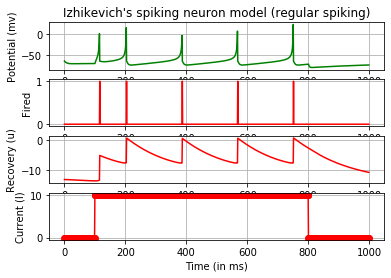

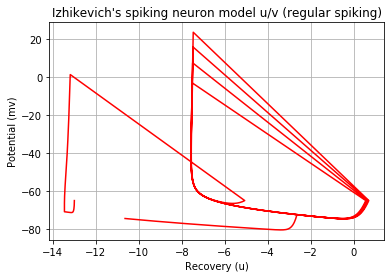

In [100]:
show('regular spiking', **neat.iznn.REGULAR_SPIKING_PARAMS)